In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

# Lectura de la base de datos 

In [6]:
df = pd.read_csv('adultosf2.csv')
df

,estrato,region_cv,est_sel,ENTIDAD,MUNICIPIO,LOCALIDAD,RESULTADO_1,RESULTADO_2,RESULTADO_3,RESULTADO_4,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,19:25:43,12/10/20,1,,1,10864.652430,3,14033.814540,2
1,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,14:28:48,12/10/20,1,,1,10864.652430,3,14033.814540,2
2,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,17:49:35,13/10/20,1,,1,10864.652430,3,14033.814540,2
3,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,3,12:19:53,12/10/20,1,,1,10380.623150,3,9574.774416,2
4,3,4,13,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,0,0,0,...,6,11:49:40,12/10/20,1,,1,10455.582230,3,9643.914413,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,4,13:14:17,24/10/20,1,,1,6281.261595,3,8113.472651,2
8591,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:05:09,23/10/20,1,,1,12002.852370,3,11071.069820,2
8592,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,3,12:53:15,23/10/20,1,,1,12890.885940,3,16121.631790,2
8593,3,4,323,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,0,0,0,...,5,14:35:38,24/10/20,1,,1,18843.784790,3,24340.417950,2


## 1 ) Descripcion del Dataset: 
 La información proviene de entrevistas realizadas durante el confinamiento por COVID-19 en México, en estas entrevistas se buscaba analizar el efecto que tuvo este confinamiento en violencia y censar la posibilidad de que las personas se aplicaran la vacuna del covid una vez que estuviera disponible. 
 Es de interés conocer: 
* ¿Que grupos de edades tienen más posibilidades de aceptar o no la nueva vacuna contra covid-19?
* ¿Hay algun género que muestre una tendencia a aceptar la vacuna? 
 

In [7]:
df.columns

Index(['estrato', 'region_cv', 'est_sel', 'ENTIDAD', 'MUNICIPIO', 'LOCALIDAD',
       'RESULTADO_1', 'RESULTADO_2', 'RESULTADO_3', 'RESULTADO_4',
       'ACEPTO ENTREVISTA', 'ADUL', 'GENERO', 'EDAD', 'NOTA04', 'VINFLUENZA',
       'VCOVID', 'FUMADOR', 'ALCOHOL', 'NOTA06', 'AGRESION', 'SUICIDIO',
       'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B', 'ADUL302B', 'ADUL301C',
       'ADUL302C', 'ADUL301D', 'ADUL302D', 'COMENTARIO', 'TIEMPO', 'HORA_FIN',
       'FECHA_FIN', 'COMPLETA', 'OTROENT', 'ADUL_COMP', 'ponde_g', 'rural_20',
       'ponde_g20', 'area_20'],
      dtype='object')

In [8]:
df.drop(['estrato', 'region_cv','est_sel',  'NOTA04', 'NOTA06',  'RESULTADO_1', 'RESULTADO_2' ,'RESULTADO_3','RESULTADO_4'],
        axis = 1,
        inplace = True)
df.head()

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,...,TIEMPO,HORA_FIN,FECHA_FIN,COMPLETA,OTROENT,ADUL_COMP,ponde_g,rural_20,ponde_g20,area_20
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,...,3,19:25:43,12/10/20,1,,1,10864.65243,3,14033.814540,2
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,...,3,14:28:48,12/10/20,1,,1,10864.65243,3,14033.814540,2
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,...,3,17:49:35,13/10/20,1,,1,10864.65243,3,14033.814540,2
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,...,3,12:19:53,12/10/20,1,,1,10380.62315,3,9574.774416,2
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,...,6,11:49:40,12/10/20,1,,1,10455.58223,3,9643.914413,2


In [9]:
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV', 'ADUL301B',
       'ADUL302B', 'ADUL301C', 'ADUL302C', 'ADUL301D', 'ADUL302D',
       'COMENTARIO', 'TIEMPO', 'HORA_FIN', 'FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20'],
      dtype='object')

In [10]:
df.drop(['ADUL301B', 'ADUL302B','ADUL301C', 'ADUL302C', 'ADUL301D',  'ADUL302D', 'COMENTARIO' ,'TIEMPO','HORA_FIN','FECHA_FIN', 'COMPLETA', 'OTROENT',
       'ADUL_COMP', 'ponde_g', 'rural_20', 'ponde_g20', 'area_20' ],
        axis = 1,
        inplace = True)
df.columns

Index(['ENTIDAD', 'MUNICIPIO', 'LOCALIDAD', 'ACEPTO ENTREVISTA', 'ADUL',
       'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID', 'FUMADOR', 'ALCOHOL',
       'AGRESION', 'SUICIDIO', 'VIOLENCIAH', 'INCREMENTOV'],
      dtype='object')

In [11]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH            int64
INCREMENTOV          object
dtype: object

## Variables de Interés:
* ENTIDAD = Estado donde se realizo la entrevista,
* GENERO
* EDAD 
* VINFLUENZA = ¿Tienen la vacuna de la influenza? , 
* VCOVID = ¿Se pondrían la vacuna del covid?, 
* FUMADOR = Consumidor de tabaco, 
* ALCOHOL= consumidor de alcohol, 
* AGRESION = Ha sufrido agresiones durante la cuarentena?,
* SUICIDIO = Ha pensado en el suicido?, 
* VIOLENCIA H = Se ha incrementado la violencia en el hogar por la cuarentena?

In [12]:
def categorizar(x): #en esta parte definimos la funcion que se categorizará
    if(0<= x <=19): # estas son las categorías
        return '<20'
    elif(20<= x <=29):
        return '20 - 29'
    elif(30<= x <= 39):
        return '30 - 39'
    else:
        return '>=40'

df['GRUPOE'] = df.apply(
        lambda tbl: categorizar(tbl['EDAD']), #En este punto estamos agregando la columna ageGP y le decimos que utilice la funcion categorizar
        axis = 1 )

In [13]:
df.head(5)

,ENTIDAD,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,9,,>=40
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,9,,>=40


In [14]:
df.VCOVID.unique()

array([2, 1, 9])

In [15]:
df.dtypes

ENTIDAD              object
MUNICIPIO            object
LOCALIDAD            object
ACEPTO ENTREVISTA     int64
ADUL                  int64
GENERO                int64
EDAD                  int64
VINFLUENZA            int64
VCOVID                int64
FUMADOR               int64
ALCOHOL               int64
AGRESION              int64
SUICIDIO              int64
VIOLENCIAH            int64
INCREMENTOV          object
GRUPOE               object
dtype: object

In [16]:
df.set_index('ENTIDAD', inplace=True)

In [17]:
df.head(5)

,MUNICIPIO,LOCALIDAD,ACEPTO ENTREVISTA,ADUL,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,1,1,73,2,1,3,3,2,5,9,,>=40


In [18]:
df.drop(['ACEPTO ENTREVISTA', 'ADUL'],
        axis = 1,
        inplace = True)
df.columns

Index(['MUNICIPIO', 'LOCALIDAD', 'GENERO', 'EDAD', 'VINFLUENZA', 'VCOVID',
       'FUMADOR', 'ALCOHOL', 'AGRESION', 'SUICIDIO', 'VIOLENCIAH',
       'INCREMENTOV', 'GRUPOE'],
      dtype='object')

In [19]:
df.head(5)

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40


# 2) Analizando la información 

In [20]:
counts = df['GRUPOE'].value_counts()
type(counts)
counts = counts.to_frame()
counts

,GRUPOE
>=40,5221
20 - 29,1757
30 - 39,1617


In [21]:
counts['%'] = counts.iloc[:,-1]/(counts.iloc[:,-1].sum(axis = 0))*100

In [22]:
counts

,GRUPOE,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [23]:
counts.columns = ['Count','%']
counts

,Count,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [24]:
counts.reset_index(drop=True)
counts

,Count,%
>=40,5221,60.744619
20 - 29,1757,20.442118
30 - 39,1617,18.813264


In [25]:
counts.columns

Index(['Count', '%'], dtype='object')

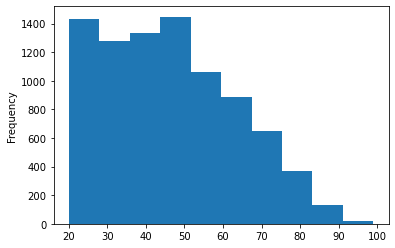

In [26]:
hist_plot = df['EDAD'].plot(kind = 'hist') 

Text(0.5, 1.0, 'Age Histogram Plot')

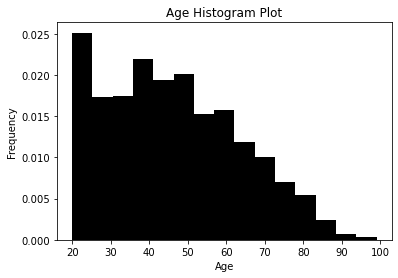

In [27]:
n, bins, patches=plt.hist(df['EDAD'],bins=15,density=True,color='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram Plot")


/Users/amecaramirez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EDAD', ylabel='Density'>

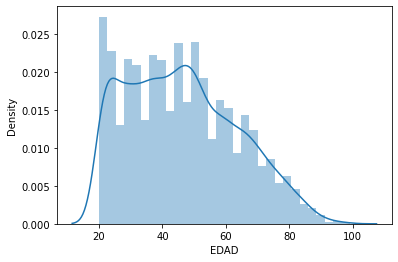

In [28]:
sns.distplot(df.EDAD)


/Users/amecaramirez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of Age')

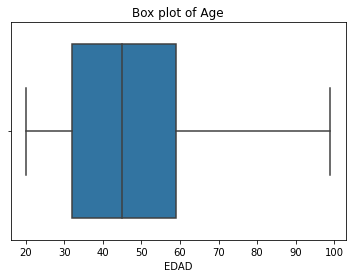

In [29]:
sns.boxplot(df['EDAD'],
           whis = (0,100)
           ).set_title('Box plot of Age')



### Los encuestados tienen rangos de edades entre **20 y 100 años**, el **75%** de los encuestados está entre los **30 y los 60 años** 

In [30]:
df['GENERO'] = df['GENERO'].astype('object')

In [31]:
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID          int64
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH      int64
INCREMENTOV    object
GRUPOE         object
dtype: object

In [32]:
df['VCOVID'] = df['VCOVID'].astype('object')
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA      int64
VCOVID         object
FUMADOR         int64
ALCOHOL         int64
AGRESION        int64
SUICIDIO        int64
VIOLENCIAH      int64
INCREMENTOV    object
GRUPOE         object
dtype: object

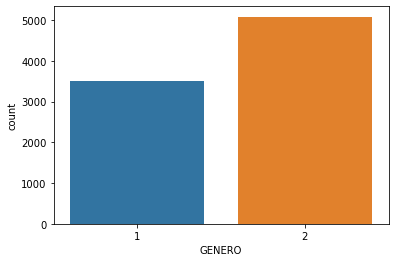

In [33]:
plt = sns.countplot(x = 'GENERO',
              data =df
             )


### Se observa que el **sexo 2** es el que más contesto en la encuesta 

# ¿Hay algun grupo de Edad que muestre mayor aceptación a la futura vacuna del covid 19?

<AxesSubplot:xlabel='VCOVID', ylabel='EDAD'>

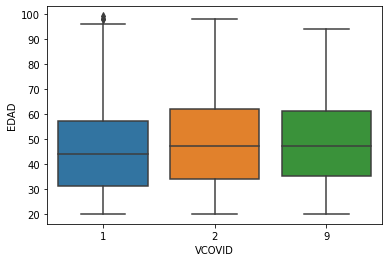

In [34]:
sns.boxplot(x = df['VCOVID'], 
            y = df['EDAD'])


In [35]:
import matplotlib.pyplot as plt

### * En ese grafico podemos ver que la mediana de edad de quienes no se pondrian la vacuna del covid y los que no saben si lo harian es practicamente igual. 



<function matplotlib.pyplot.show(close=None, block=None)>

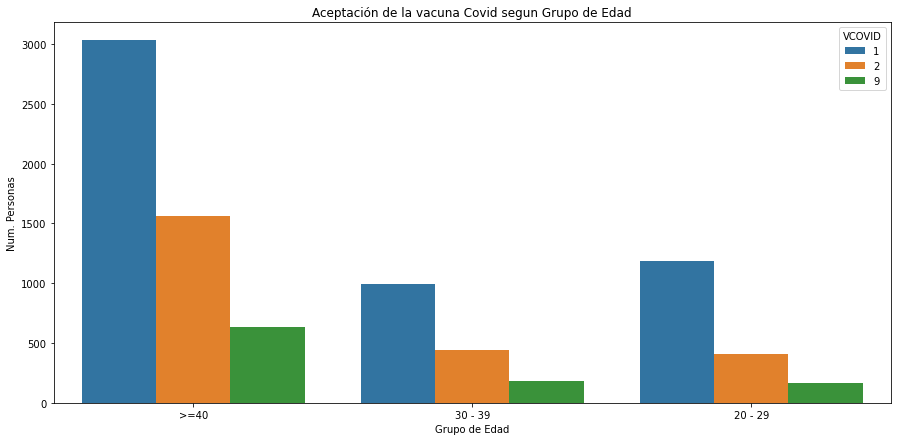

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='GRUPOE', hue='VCOVID',)
plt.title('Aceptación de la vacuna Covid segun Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Num. Personas')
plt.show

### * Pareciera que en el el grupo de 20-29 años la proporcion de aceptación de vacunas es mayor que en el grupo de 30-39

### Aceptacion de la vacuna según Genero

<AxesSubplot:xlabel='GENERO', ylabel='EDAD'>

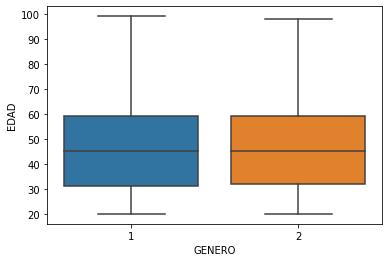

In [37]:
sns.boxplot(x = df['GENERO'], 
            y = df['EDAD'])

### * La proporcion en edades se mantiene para los dos sexos, por lo que las respuetas por grupo de edad siguen siendo proporcionales

<function matplotlib.pyplot.show(close=None, block=None)>

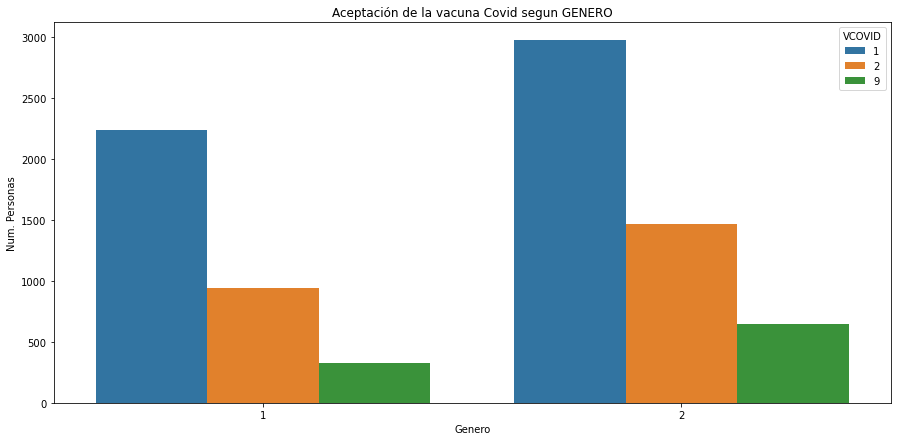

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='GENERO', hue='VCOVID',)
plt.title('Aceptación de la vacuna Covid segun GENERO')
plt.xlabel('Genero')
plt.ylabel('Num. Personas')
plt.show

## ¿El genero femenino tiene una mayor aceptación? o se mantiene? 

In [39]:
avBi2 = pd.pivot_table(df,
                      index = ['VCOVID'],
                      values = ['GRUPOE'],
                      columns =['GENERO'],
                     aggfunc = 'count' 
                     )
avBi2

GRUPOE      
GENERO      1     2
VCOVID             
1        2238  2974
2         945  1467
9         328   643

## Limitaciones: tengo problemas detectando que tipo de datos pueden ser usados para los tipos de operaciones, por ejemplo ¿que hay que hacer para trabajar con los datos de una tabla pivote? ¿que condiciones se requieren cumplir para los distintos tipos de información que estamos analizando? 

## Siguientes pasos analizar las proporciones de aceptación a la vacuna de covid vs géneros y rangos de edad, analizar por entidad si hay alguna donde se muestre una tendencia mayor a la aceptación o rechazo de la vacuna, y como se relaciona la aceptación de la vacuna con los pensamientos suicidas. 

In [40]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [41]:
df = df.astype(str)
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD           object
VINFLUENZA     object
VCOVID         object
FUMADOR        object
ALCOHOL        object
AGRESION       object
SUICIDIO       object
VIOLENCIAH     object
INCREMENTOV    object
GRUPOE         object
dtype: object

In [42]:
df['EDAD'] = df['EDAD'].astype(int)

In [43]:
df.dtypes

MUNICIPIO      object
LOCALIDAD      object
GENERO         object
EDAD            int64
VINFLUENZA     object
VCOVID         object
FUMADOR        object
ALCOHOL        object
AGRESION       object
SUICIDIO       object
VIOLENCIAH     object
INCREMENTOV    object
GRUPOE         object
dtype: object

In [44]:
states = pd.pivot_table(df,
                      index = ['ENTIDAD'],
                      values =['VCOVID'],  
                      columns =['VIOLENCIAH'],
                     aggfunc = 'count' 
                     )
states

VCOVID              
VIOLENCIAH                              1      2      9
ENTIDAD                                                
01 AGUASCALIENTES                     5.0   32.0   22.0
02 BAJA CALIFORNIA                    9.0  112.0  113.0
03 BAJA CALIFORNIA SUR                NaN   27.0   18.0
04 CAMPECHE                           1.0   32.0   28.0
05 COAHUILA DE ZARAGOZA               3.0   94.0   85.0
06 COLIMA                             2.0   26.0   17.0
07 CHIAPAS                           12.0  225.0  144.0
08 CHIHUAHUA                          3.0  118.0   90.0
09 CIUDAD DE MÉXICO                  37.0  550.0  412.0
10 DURANGO                            1.0   48.0   38.0
11 GUANAJUATO                        21.0  587.0  427.0
12 GUERRERO                           8.0  119.0   95.0
13 HIDALGO                            7.0  115.0   70.0
14 JALISCO                           11.0  251.0  208.0
15 MÉXICO                            20.0  482.0  339.0
16 MICHOACÁN DE OCAMPO                7.0  197.0  135.0
17 MORELOS                            3.0   58.0   35.0
18 NAYARIT                            3.0   52.0   29.0
19 NUEVO LEÓN                         6.0  180.0  134.0
20 OAXACA                             3.0  148.0   85.0
21 PUEBLA                             9.0  225.0  120.0
22 QUERÉTARO                          1.0   73.0   50.0
23 QUINTANA ROO                       3.0   43.0   48.0
24 SAN LUIS POTOSÍ                    5.0   68.0   59.0
25 SINALOA                           10.0  128.0   91.0
26 SONORA                             8.0  122.0  105.0
27 TABASCO                           13.0   93.0   73.0
28 TAMAULIPAS                         3.0   96.0   61.0
29 TLAXCALA                           NaN   49.0   29.0
30 VERACRUZ DE IGNACIO DE LA LLAVE   14.0  345.0  242.0
31 YUCATÁN                            5.0   90.0   73.0
32 ZACATECAS                          2.0   58.0   42.0

In [45]:
states.columns

MultiIndex([('VCOVID', '1'),
            ('VCOVID', '2'),
            ('VCOVID', '9')],
           names=[None, 'VIOLENCIAH'])

In [46]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [47]:
df.index

Index(['01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES', '01 AGUASCALIENTES', '01 AGUASCALIENTES',
       '01 AGUASCALIENTES',
       ...
       '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS',
       '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS', '32 ZACATECAS',
       '32 ZACATECAS', '32 ZACATECAS'],
      dtype='object', name='ENTIDAD', length=8595)

In [48]:
df.reset_index()

,ENTIDAD,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
0,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
1,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
2,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
3,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
4,01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
8591,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
8592,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39
8593,32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,60,1,2,3,3,2,5,2,,>=40


In [49]:
states = pd.pivot_table(df,
                      index = ['ENTIDAD'],
                      values =['VIOLENCIAH'],  
                      columns =['VCOVID'],
                     aggfunc = 'count' 
                     )
states #Esta tabla es sobre aceptacion de la vacuna 

VIOLENCIAH          
VCOVID                                      1    2    9
ENTIDAD                                                
01 AGUASCALIENTES                          39   15    5
02 BAJA CALIFORNIA                        163   45   26
03 BAJA CALIFORNIA SUR                     32    9    4
04 CAMPECHE                                42   11    8
05 COAHUILA DE ZARAGOZA                   123   37   22
06 COLIMA                                  26   13    6
07 CHIAPAS                                219  128   34
08 CHIHUAHUA                              130   59   22
09 CIUDAD DE MÉXICO                       699  224   76
10 DURANGO                                 57   24    6
11 GUANAJUATO                             583  298  154
12 GUERRERO                               120   86   16
13 HIDALGO                                103   51   38
14 JALISCO                                243  167   60
15 MÉXICO                                 515  252   74
16 MICHOACÁN DE OCAMPO                    167  133   39
17 MORELOS                                 59   24   13
18 NAYARIT                                 46   36    2
19 NUEVO LEÓN                             179   76   65
20 OAXACA                                 116   83   37
21 PUEBLA                                 211  100   43
22 QUERÉTARO                               70   42   12
23 QUINTANA ROO                            57   27   10
24 SAN LUIS POTOSÍ                         63   38   31
25 SINALOA                                139   68   22
26 SONORA                                 148   66   21
27 TABASCO                                128   35   16
28 TAMAULIPAS                             104   39   17
29 TLAXCALA                                39   28   11
30 VERACRUZ DE IGNACIO DE LA LLAVE        373  162   66
31 YUCATÁN                                140   17   11
32 ZACATECAS                               79   19    4

In [50]:
states.columns

MultiIndex([('VIOLENCIAH', '1'),
            ('VIOLENCIAH', '2'),
            ('VIOLENCIAH', '9')],
           names=[None, 'VCOVID'])

In [51]:
vio = states['VIOLENCIAH','2']
vio #2 SIGNIFICA QUE no aceptarian la vacuna del covid  

ENTIDAD
01 AGUASCALIENTES                      15
02 BAJA CALIFORNIA                     45
03 BAJA CALIFORNIA SUR                  9
04 CAMPECHE                            11
05 COAHUILA DE ZARAGOZA                37
06 COLIMA                              13
07 CHIAPAS                            128
08 CHIHUAHUA                           59
09 CIUDAD DE MÉXICO                   224
10 DURANGO                             24
11 GUANAJUATO                         298
12 GUERRERO                            86
13 HIDALGO                             51
14 JALISCO                            167
15 MÉXICO                             252
16 MICHOACÁN DE OCAMPO                133
17 MORELOS                             24
18 NAYARIT                             36
19 NUEVO LEÓN                          76
20 OAXACA                              83
21 PUEBLA                             100
22 QUERÉTARO                           42
23 QUINTANA ROO                        27
24 SAN LUIS POTOSÍ        

In [52]:
vio

ENTIDAD
01 AGUASCALIENTES                      15
02 BAJA CALIFORNIA                     45
03 BAJA CALIFORNIA SUR                  9
04 CAMPECHE                            11
05 COAHUILA DE ZARAGOZA                37
06 COLIMA                              13
07 CHIAPAS                            128
08 CHIHUAHUA                           59
09 CIUDAD DE MÉXICO                   224
10 DURANGO                             24
11 GUANAJUATO                         298
12 GUERRERO                            86
13 HIDALGO                             51
14 JALISCO                            167
15 MÉXICO                             252
16 MICHOACÁN DE OCAMPO                133
17 MORELOS                             24
18 NAYARIT                             36
19 NUEVO LEÓN                          76
20 OAXACA                              83
21 PUEBLA                             100
22 QUERÉTARO                           42
23 QUINTANA ROO                        27
24 SAN LUIS POTOSÍ        

In [53]:
type(vio)

pandas.core.series.Series

In [54]:
vio.to_frame()

,VIOLENCIAH
,2
ENTIDAD,
01 AGUASCALIENTES,15
02 BAJA CALIFORNIA,45
03 BAJA CALIFORNIA SUR,9
04 CAMPECHE,11
05 COAHUILA DE ZARAGOZA,37
06 COLIMA,13
07 CHIAPAS,128
08 CHIHUAHUA,59


# top entidades que no aceptarian vacuna covid 

In [56]:
vio2 =vio.sort_values(ascending= False) 
vio2

ENTIDAD
11 GUANAJUATO                         298
15 MÉXICO                             252
09 CIUDAD DE MÉXICO                   224
14 JALISCO                            167
30 VERACRUZ DE IGNACIO DE LA LLAVE    162
16 MICHOACÁN DE OCAMPO                133
07 CHIAPAS                            128
21 PUEBLA                             100
12 GUERRERO                            86
20 OAXACA                              83
19 NUEVO LEÓN                          76
25 SINALOA                             68
26 SONORA                              66
08 CHIHUAHUA                           59
13 HIDALGO                             51
02 BAJA CALIFORNIA                     45
22 QUERÉTARO                           42
28 TAMAULIPAS                          39
24 SAN LUIS POTOSÍ                     38
05 COAHUILA DE ZARAGOZA                37
18 NAYARIT                             36
27 TABASCO                             35
29 TLAXCALA                            28
23 QUINTANA ROO           

In [57]:
vac = pd.pivot_table(df,
                      index = ['ENTIDAD'],
                      values =['VCOVID'],  
                      columns =['VIOLENCIAH'],
                     aggfunc = 'count' 
                     )
vac

VCOVID              
VIOLENCIAH                              1      2      9
ENTIDAD                                                
01 AGUASCALIENTES                     5.0   32.0   22.0
02 BAJA CALIFORNIA                    9.0  112.0  113.0
03 BAJA CALIFORNIA SUR                NaN   27.0   18.0
04 CAMPECHE                           1.0   32.0   28.0
05 COAHUILA DE ZARAGOZA               3.0   94.0   85.0
06 COLIMA                             2.0   26.0   17.0
07 CHIAPAS                           12.0  225.0  144.0
08 CHIHUAHUA                          3.0  118.0   90.0
09 CIUDAD DE MÉXICO                  37.0  550.0  412.0
10 DURANGO                            1.0   48.0   38.0
11 GUANAJUATO                        21.0  587.0  427.0
12 GUERRERO                           8.0  119.0   95.0
13 HIDALGO                            7.0  115.0   70.0
14 JALISCO                           11.0  251.0  208.0
15 MÉXICO                            20.0  482.0  339.0
16 MICHOACÁN DE OCAMPO                7.0  197.0  135.0
17 MORELOS                            3.0   58.0   35.0
18 NAYARIT                            3.0   52.0   29.0
19 NUEVO LEÓN                         6.0  180.0  134.0
20 OAXACA                             3.0  148.0   85.0
21 PUEBLA                             9.0  225.0  120.0
22 QUERÉTARO                          1.0   73.0   50.0
23 QUINTANA ROO                       3.0   43.0   48.0
24 SAN LUIS POTOSÍ                    5.0   68.0   59.0
25 SINALOA                           10.0  128.0   91.0
26 SONORA                             8.0  122.0  105.0
27 TABASCO                           13.0   93.0   73.0
28 TAMAULIPAS                         3.0   96.0   61.0
29 TLAXCALA                           NaN   49.0   29.0
30 VERACRUZ DE IGNACIO DE LA LLAVE   14.0  345.0  242.0
31 YUCATÁN                            5.0   90.0   73.0
32 ZACATECAS                          2.0   58.0   42.0

In [60]:
vac.columns

MultiIndex([('VCOVID', '1'),
            ('VCOVID', '2'),
            ('VCOVID', '9')],
           names=[None, 'VIOLENCIAH'])

In [61]:
vac2 = vac['VCOVID','2']
vac2

ENTIDAD
01 AGUASCALIENTES                      32.0
02 BAJA CALIFORNIA                    112.0
03 BAJA CALIFORNIA SUR                 27.0
04 CAMPECHE                            32.0
05 COAHUILA DE ZARAGOZA                94.0
06 COLIMA                              26.0
07 CHIAPAS                            225.0
08 CHIHUAHUA                          118.0
09 CIUDAD DE MÉXICO                   550.0
10 DURANGO                             48.0
11 GUANAJUATO                         587.0
12 GUERRERO                           119.0
13 HIDALGO                            115.0
14 JALISCO                            251.0
15 MÉXICO                             482.0
16 MICHOACÁN DE OCAMPO                197.0
17 MORELOS                             58.0
18 NAYARIT                             52.0
19 NUEVO LEÓN                         180.0
20 OAXACA                             148.0
21 PUEBLA                             225.0
22 QUERÉTARO                           73.0
23 QUINTANA ROO         

In [62]:
vac3 = vac2.sort_values(ascending = False)

In [63]:
vac3

ENTIDAD
11 GUANAJUATO                         587.0
09 CIUDAD DE MÉXICO                   550.0
15 MÉXICO                             482.0
30 VERACRUZ DE IGNACIO DE LA LLAVE    345.0
14 JALISCO                            251.0
21 PUEBLA                             225.0
07 CHIAPAS                            225.0
16 MICHOACÁN DE OCAMPO                197.0
19 NUEVO LEÓN                         180.0
20 OAXACA                             148.0
25 SINALOA                            128.0
26 SONORA                             122.0
12 GUERRERO                           119.0
08 CHIHUAHUA                          118.0
13 HIDALGO                            115.0
02 BAJA CALIFORNIA                    112.0
28 TAMAULIPAS                          96.0
05 COAHUILA DE ZARAGOZA                94.0
27 TABASCO                             93.0
31 YUCATÁN                             90.0
22 QUERÉTARO                           73.0
24 SAN LUIS POTOSÍ                     68.0
17 MORELOS              

In [64]:
vio

ENTIDAD
01 AGUASCALIENTES                      15
02 BAJA CALIFORNIA                     45
03 BAJA CALIFORNIA SUR                  9
04 CAMPECHE                            11
05 COAHUILA DE ZARAGOZA                37
06 COLIMA                              13
07 CHIAPAS                            128
08 CHIHUAHUA                           59
09 CIUDAD DE MÉXICO                   224
10 DURANGO                             24
11 GUANAJUATO                         298
12 GUERRERO                            86
13 HIDALGO                             51
14 JALISCO                            167
15 MÉXICO                             252
16 MICHOACÁN DE OCAMPO                133
17 MORELOS                             24
18 NAYARIT                             36
19 NUEVO LEÓN                          76
20 OAXACA                              83
21 PUEBLA                             100
22 QUERÉTARO                           42
23 QUINTANA ROO                        27
24 SAN LUIS POTOSÍ        

# Hay correlacion entre la violencia y el rechazo a la vacuna covid?

In [68]:
cor = vio2.to_frame(name = 'Vacuna Covid').join(vac2.to_frame(name = 'Violencia'))

In [69]:
cor

,Vacuna Covid,Violencia
ENTIDAD,,
11 GUANAJUATO,298,587.0
15 MÉXICO,252,482.0
09 CIUDAD DE MÉXICO,224,550.0
14 JALISCO,167,251.0
30 VERACRUZ DE IGNACIO DE LA LLAVE,162,345.0
16 MICHOACÁN DE OCAMPO,133,197.0
07 CHIAPAS,128,225.0
21 PUEBLA,100,225.0
12 GUERRERO,86,119.0


In [70]:
cor.corr(method = 'pearson')

,Vacuna Covid,Violencia
Vacuna Covid,1.000000,0.973859
Violencia,0.973859,1.000000


In [71]:
cor.columns

Index(['Vacuna Covid', 'Violencia'], dtype='object')

Text(0.5, 1.0, 'Diagrama Incremento de Violencia vs Rechazo a la Vacuna')

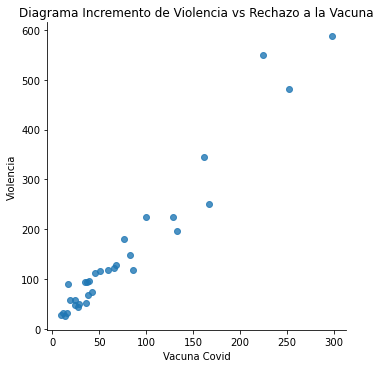

In [74]:
sns.lmplot(x = 'Vacuna Covid',
          y = 'Violencia',
          fit_reg = False,
          data = cor)
plt.title('Diagrama Incremento de Violencia vs Rechazo a la Vacuna')

## Se encuentra una correlación directa entre el rechazo de la vacuna y el incremento de la violencia durante el confinamiento 

In [75]:
df

,MUNICIPIO,LOCALIDAD,GENERO,EDAD,VINFLUENZA,VCOVID,FUMADOR,ALCOHOL,AGRESION,SUICIDIO,VIOLENCIAH,INCREMENTOV,GRUPOE
ENTIDAD,,,,,,,,,,,,,
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,67,1,2,3,4,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,92,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,2,71,2,2,3,5,2,5,2,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,57,2,2,1,5,2,5,9,,>=40
01 AGUASCALIENTES,001 AGUASCALIENTES,0001 AGUASCALIENTES,1,73,2,1,3,3,2,5,9,,>=40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,2,58,2,2,1,5,2,5,2,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,57,2,2,3,5,2,5,9,,>=40
32 ZACATECAS,056 ZACATECAS,0001 ZACATECAS,1,37,1,1,3,5,2,5,9,,30 - 39


In [76]:
type(df['EDAD'])

pandas.core.series.Series

In [77]:
type(df['SUICIDIO'])

pandas.core.series.Series

In [78]:
y = pd.DataFrame(df['SUICIDIO'])
x = pd.DataFrame(df['EDAD'])

In [79]:
y.head(2)

,SUICIDIO
ENTIDAD,
01 AGUASCALIENTES,5
01 AGUASCALIENTES,5


In [81]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [82]:
import statsmodels.api as sm

In [83]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [84]:
from sklearn import linear_model

In [85]:
lm = linear_model.LinearRegression()
model_lm = lm.fit(x,y)
model_lm

LinearRegression()

In [86]:
print ('The intercept (b0) is  \t\t\t : ', model_lm.intercept_)
print ('The coefficients (b1, b2, b3, ...) are:', model_lm.coef_)
print ('Model score (R-Square) value is  \:', model_lm.score(x,y))

The intercept (b0) is  			 :  [4.87713437]
The coefficients (b1, b2, b3, ...) are: [[0.00099406]]
Model score (R-Square) value is  \: 0.0015789227137356088


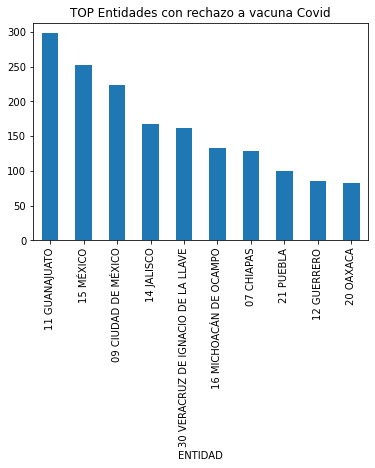

In [96]:
hist_plot = (vio2[:10]).plot(kind = 'bar') 


plt.title('TOP Entidades con rechazo a vacuna Covid')
plt.show()

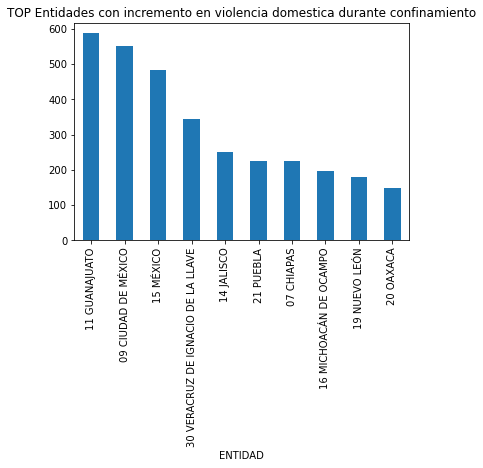

In [97]:
hist_plot2 = (vac3[:10]).plot(kind = 'bar') 


plt.title('TOP Entidades con incremento en violencia domestica durante confinamiento')
plt.show()

In [98]:
states

VIOLENCIAH          
VCOVID                                      1    2    9
ENTIDAD                                                
01 AGUASCALIENTES                          39   15    5
02 BAJA CALIFORNIA                        163   45   26
03 BAJA CALIFORNIA SUR                     32    9    4
04 CAMPECHE                                42   11    8
05 COAHUILA DE ZARAGOZA                   123   37   22
06 COLIMA                                  26   13    6
07 CHIAPAS                                219  128   34
08 CHIHUAHUA                              130   59   22
09 CIUDAD DE MÉXICO                       699  224   76
10 DURANGO                                 57   24    6
11 GUANAJUATO                             583  298  154
12 GUERRERO                               120   86   16
13 HIDALGO                                103   51   38
14 JALISCO                                243  167   60
15 MÉXICO                                 515  252   74
16 MICHOACÁN DE OCAMPO                    167  133   39
17 MORELOS                                 59   24   13
18 NAYARIT                                 46   36    2
19 NUEVO LEÓN                             179   76   65
20 OAXACA                                 116   83   37
21 PUEBLA                                 211  100   43
22 QUERÉTARO                               70   42   12
23 QUINTANA ROO                            57   27   10
24 SAN LUIS POTOSÍ                         63   38   31
25 SINALOA                                139   68   22
26 SONORA                                 148   66   21
27 TABASCO                                128   35   16
28 TAMAULIPAS                             104   39   17
29 TLAXCALA                                39   28   11
30 VERACRUZ DE IGNACIO DE LA LLAVE        373  162   66
31 YUCATÁN                                140   17   11
32 ZACATECAS                               79   19    4

In [99]:
vacy = states['VIOLENCIAH','1'] #vacuna yes 

In [100]:
vacy

ENTIDAD
01 AGUASCALIENTES                      39
02 BAJA CALIFORNIA                    163
03 BAJA CALIFORNIA SUR                 32
04 CAMPECHE                            42
05 COAHUILA DE ZARAGOZA               123
06 COLIMA                              26
07 CHIAPAS                            219
08 CHIHUAHUA                          130
09 CIUDAD DE MÉXICO                   699
10 DURANGO                             57
11 GUANAJUATO                         583
12 GUERRERO                           120
13 HIDALGO                            103
14 JALISCO                            243
15 MÉXICO                             515
16 MICHOACÁN DE OCAMPO                167
17 MORELOS                             59
18 NAYARIT                             46
19 NUEVO LEÓN                         179
20 OAXACA                             116
21 PUEBLA                             211
22 QUERÉTARO                           70
23 QUINTANA ROO                        57
24 SAN LUIS POTOSÍ        

# Top entidades que aceptarian vacunas covid 

In [101]:
vacy1 = vacy.sort_values(ascending = False)
vacy1

ENTIDAD
09 CIUDAD DE MÉXICO                   699
11 GUANAJUATO                         583
15 MÉXICO                             515
30 VERACRUZ DE IGNACIO DE LA LLAVE    373
14 JALISCO                            243
07 CHIAPAS                            219
21 PUEBLA                             211
19 NUEVO LEÓN                         179
16 MICHOACÁN DE OCAMPO                167
02 BAJA CALIFORNIA                    163
26 SONORA                             148
31 YUCATÁN                            140
25 SINALOA                            139
08 CHIHUAHUA                          130
27 TABASCO                            128
05 COAHUILA DE ZARAGOZA               123
12 GUERRERO                           120
20 OAXACA                             116
28 TAMAULIPAS                         104
13 HIDALGO                            103
32 ZACATECAS                           79
22 QUERÉTARO                           70
24 SAN LUIS POTOSÍ                     63
17 MORELOS                

# ¿Como se ven los comportamientos de los estados que aceptan la vacuna vs los que no?

In [103]:
kakun = vio2.to_frame(name = 'Rechaza').join(vacy1.to_frame(name = 'Acepta')).join

In [104]:
kakun

,Rechaza,Acepta
ENTIDAD,,
11 GUANAJUATO,298,583
15 MÉXICO,252,515
09 CIUDAD DE MÉXICO,224,699
14 JALISCO,167,243
30 VERACRUZ DE IGNACIO DE LA LLAVE,162,373
16 MICHOACÁN DE OCAMPO,133,167
07 CHIAPAS,128,219
21 PUEBLA,100,211
12 GUERRERO,86,120


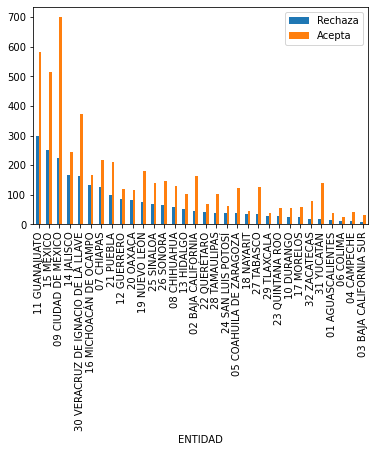

In [105]:
gra = kakun.plot(kind = 'bar')

In [107]:
kakun1 = vacy1.to_frame(name = 'Acepta').join(vac3.to_frame(name = 'Violencia'))

In [108]:
kakun1

,Acepta,Violencia
ENTIDAD,,
09 CIUDAD DE MÉXICO,699,550.0
11 GUANAJUATO,583,587.0
15 MÉXICO,515,482.0
30 VERACRUZ DE IGNACIO DE LA LLAVE,373,345.0
14 JALISCO,243,251.0
07 CHIAPAS,219,225.0
21 PUEBLA,211,225.0
19 NUEVO LEÓN,179,180.0
16 MICHOACÁN DE OCAMPO,167,197.0


Text(0.5, 1.0, 'Scatterplot of Acepta Vacuna vs Incremento Violencia')

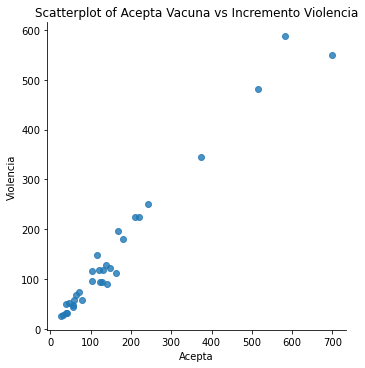

In [112]:
sns.lmplot(x = 'Acepta', 
          y = 'Violencia',
          data = kakun1,
          fit_reg = False)
          #hue = 'Gender' ) ## <- Categorical data 

plt.title('Scatterplot of Acepta Vacuna vs Incremento Violencia')

In [113]:
df.shape

(8595, 13)